In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data=pd.DataFrame({'Weight':[0.5,2.3,2.9],'Height':[1.4,1.9,3.2]})
data

,Weight,Height
0,0.5,1.4
1,2.3,1.9
2,2.9,3.2


1. weight is the independent variable
2. height is the dependent vriable(target)
3. we are going to predict height from weight

#### pred_Height = b1*Weight + b0

Building the regression model is nothing but finding/optimising these coefficients(b0,b1). Let's start with freezing one coefficient b1=0.64(to reduce mathematical complexities),and computing other one b0.

The idea of finding these coefficients is : Compute the values for b0 and b1 such that the error is minimum.

what is error? sum((Actual_Height-Predicted_Height)^2)

sum((Actual_Height-(b1*Weight + b0))^2) ---> 0

In [36]:
# best line fit equation
# initially we will consider some random values of b0 and b1

b0 = 0
b1 = 0.64
Pred_Height = b0 + b1*data['Weight']

In [37]:
Pred_Height

0    0.320
1    1.472
2    1.856
Name: Weight, dtype: float64

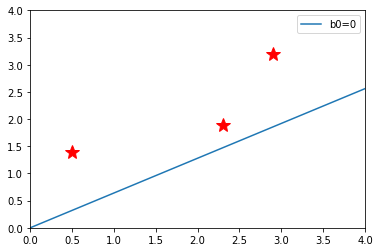

In [38]:
# plot the dataset (height,weight) red stars are the actual observations(datapoints)
# the blue line is the one obtained when b0 is substituted as zero(predicted values)

plt.plot(data['Weight'],data['Height'],'*',markersize=14,color='red')
plt.axis([0,4,0,4])
x=np.linspace(0,4,50)
plt.plot(x,b1*x+b0,label='b0=0')
plt.legend()

In [ ]:
'''
The line is deviatong a lot from the actual data points, therefore we can say that this is not an optimal line.
Also we won't be getting an optimal line because we have chosen a random value for b0 i.e., 0 not on the
basis of minimising the error strategy.
'''

In [ ]:
# To Compute Error

In [39]:
# SquaredError = (Pred_Height-Height)^2

er = Pred_Height-data['Height'] 
se = np.power(er,2)
print(se)
sse = np.sum(se)
print('The sum of squared Error is:',sse)

0    1.166400
1    0.183184
2    1.806336
dtype: float64
The sum of squared Error is: 3.1559200000000005


In [40]:
# we will now explore the error value for different combination of b0 values
b0 = [0,0.25,0.5,0.75,1,1.25,1.75,2]
sum_squared_error = []

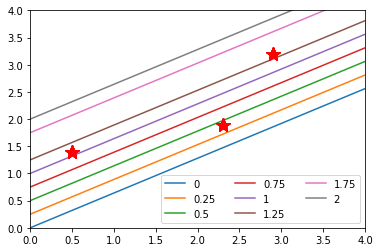

In [41]:
# plotting the regression line wrt different b0 values

for i in b0:
    plt.plot(data['Weight'],data['Height'],'*',markersize=14,color='red')
    plt.axis([0,4,0,4])
    x=np.linspace(0,4,50)
    plt.plot(x,b1*x+i,label=i)
    plt.legend(ncol=3)

In [42]:
# computing sse for each b0

for i in b0:
    Pred_Height = i + b1*data['Weight']
    er = Pred_Height-data['Height']
    se = np.power(er,2)
    sum_squared_error.append(np.sum(se))
    
SSE = pd.DataFrame(sum_squared_error)
b0 = pd.DataFrame(b0)

In [43]:
sse_b0 = pd.concat([b0,SSE],axis=1)

In [44]:
sse_b0.columns=['b0','sse']
sse_b0

,b0,sse
0,0.00,3.15592
1,0.25,1.91742
2,0.50,1.05392
3,0.75,0.56542
4,1.00,0.45192
5,1.25,0.71342
6,1.75,2.36142
7,2.00,3.74792


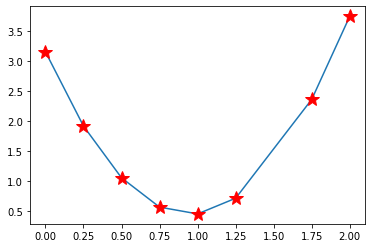

In [46]:
plt.plot(sse_b0['b0'],sse_b0['sse'])
plt.plot(sse_b0['b0'],sse_b0['sse'],'*',markersize=14,color='red')
plt.show()

In [ ]:
'''
In this situation we will be choosing 1 as b0 value , as it is giving the lowest sse, even though the sse is not
nearly zero but comparitively minimum.

But here we didnot even explore the sse for these b0 values ---->0.99,0.98,0.97,0.96,1.1,1.2 etc... 
the sse values for these can be comparitively better.

For every possible b0, we are not finding sse, so this is not the optimal b0.
we need to find that one optimal value of b0  which produce the least sse.
'''

This trail and error method won't work here, this raw approach of assuming different b0 values, substituting them in the LR euation and calculating SSE everytime, won't work, because we need to substitute all the possible combinations
for different b0 values and this will become a complicated process if we have multiple features in the dataset, to find which combination of coefficients will give the least sse.

This process is therefore very hectic and complicated and we will be needing an algorithm that can tune this b0 (or different coefficients) to an optimal value for which the model is producing least sse.

#### THEREFORE IN ORDER TO ACHIEVE THIS (FIND OPTIMAL COEFFICIENT VALUES) WE GO FOR GRADIENT DESCENT ALGORITHM.